# Animated scatterplot

Visualization of fertility rate and life expectancy correlation evolution over time, compared between different countries and continents. 

If you would like to learn more: 
* https://www.gapminder.org (Dta source)
* https://youtu.be/jbkSRLYSojo

## Import the packages and data

Packages needed for data visualization:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the *.csv data file into pandas.

In [27]:
#Fertility data 
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)

#Life expectancy
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)

#Population
population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)

#Continents
continents = pd.read_csv('../data/continents.csv', sep = ';')

## Explore the dataframes

In [28]:
fert.head()

1800  1801  1802  1803  1804  1805  1806  1807  1808  \
Total fertility rate                                                          
Abkhazia                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria                6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   

                       1809  ...  2006  2007  2008  2009  2010  2011  2012  \
Total fertility rate         ...                                             
Abkhazia                NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  ...  6.70  6.46  6.20  5.93  5.66  5.40  5.14   
Akrotiri and Dhekelia   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  ...  1.85  1.80  1.76  1.74  1.74  1.75  1.76   
Algeria                6.99  ...  2.58  2.66  2.73  2.78  2.82  2.83  2.82   

                       2013  2014  2015  
Total fertility rate                     
Abkhazia                NaN   NaN   NaN  
Afghanistan            4.90  4.68  4.47  
Akrotiri and Dhekelia   NaN   NaN   NaN  
Albania                1.77  1.78  1.78  
Algeria                2.80  2.76  2.71  

[5 rows x 216 columns]

In [29]:
life.head()

1800.0  1801.0  1802.0  1803.0  1804.0  1805.0  1806.0  \
Life expectancy                                                                 
Abkhazia                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Afghanistan             28.21   28.20   28.19   28.18   28.17   28.16   28.15   
Akrotiri and Dhekelia     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Albania                 35.40   35.40   35.40   35.40   35.40   35.40   35.40   
Algeria                 28.82   28.82   28.82   28.82   28.82   28.82   28.82   

                       1807.0  1808.0  1809.0  ...  2007.0  2008.0  2009.0  \
Life expectancy                                ...                           
Abkhazia                  NaN     NaN     NaN  ...     NaN     NaN     NaN   
Afghanistan             28.14   28.13   28.12  ...    52.4    52.8    53.3   
Akrotiri and Dhekelia     NaN     NaN     NaN  ...     NaN     NaN     NaN   
Albania                 35.40   35.40   35.40  ...    76.6    76.8    77.0   
Algeria                 28.82   28.82   28.82  ...    75.3    75.5    75.7   

                       2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  
Life expectancy                                                                
Abkhazia                  NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Afghanistan              53.6    54.0    54.4    54.8    54.9    53.8   52.72  
Akrotiri and Dhekelia     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Albania                  77.2    77.4    77.5    77.7    77.9    78.0   78.10  
Algeria                  76.0    76.1    76.2    76.3    76.3    76.4   76.50  

[5 rows x 217 columns]

In [30]:
population.head()

1800.0     1810.0     1820.0     1830.0     1840.0  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3280000.0  3280000.0  3323519.0  3448982.0  3625022.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 410445.0   423591.0   438671.0   457234.0   478227.0   
Algeria                2503218.0  2595056.0  2713079.0  2880355.0  3082721.0   

                          1850.0     1860.0     1870.0     1880.0     1890.0  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3810047.0  3973968.0  4169690.0  4419695.0  4710171.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 506889.0   552800.0   610036.0   672544.0   741688.0   
Algeria                3299305.0  3536468.0  3811028.0  4143163.0  4525691.0   

                       ...      2006.0      2007.0      2008.0      2009.0  \
Total population       ...                                                   
Abkhazia               ...         NaN         NaN         NaN         NaN   
Afghanistan            ...  25183615.0  25877544.0  26528741.0  27207291.0   
Akrotiri and Dhekelia  ...     15700.0     15700.0     15700.0         NaN   
Albania                ...   3050741.0   3010849.0   2968026.0   2929886.0   
Algeria                ...  33749328.0  34261971.0  34811059.0  35401790.0   

                           2010.0      2011.0      2012.0      2013.0  \
Total population                                                        
Abkhazia                      NaN         NaN         NaN         NaN   
Afghanistan            27962207.0  28809167.0  29726803.0  30682500.0   
Akrotiri and Dhekelia         NaN         NaN         NaN         NaN   
Albania                 2901883.0   2886010.0   2880667.0   2883281.0   
Algeria                36036159.0  36717132.0  37439427.0  38186135.0   

                           2014.0      2015.0  
Total population                               
Abkhazia                      NaN         NaN  
Afghanistan            31627506.0  32526562.0  
Akrotiri and Dhekelia         NaN         NaN  
Albania                 2889676.0   2896679.0  
Algeria                38934334.0  39666519.0  

[5 rows x 81 columns]

In [31]:
#Check the shape of the tables

fert.shape, life.shape, population.shape

((260, 216), (260, 217), (275, 81))

In [32]:
#The column format (years) of fertility and life expectancy do not match, and need to be adjusted before merging

type(fert.columns), type(life.columns), type(population.columns)

(pandas.core.indexes.base.Index,
 pandas.core.indexes.numeric.Float64Index,
 pandas.core.indexes.numeric.Float64Index)

In [33]:
fert.columns = fert.columns.astype(int)
life.columns = life.columns.astype(int)
population.columns = population.columns.astype(int)

In [34]:
#now they both are integers (Int)

type(fert.columns), type(life.columns), type(population.columns)


(pandas.core.indexes.numeric.Int64Index,
 pandas.core.indexes.numeric.Int64Index,
 pandas.core.indexes.numeric.Int64Index)

In [35]:
#Correct the index name to country

fert.index.name = 'country'
life.index.name = 'country'
population.index.name = 'country'



## Prepare a merged dataframe

In [36]:
#Switch from wide to long

fert = fert.reset_index()
fert_m = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
life = life.reset_index()
life_m = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
population = population.reset_index()
population_m = population.melt(id_vars='country', var_name='year', value_name='population')

In [37]:
#Example
fert_m.head()

country  year  fertility_rate
0               Abkhazia  1800             NaN
1            Afghanistan  1800            7.00
2  Akrotiri and Dhekelia  1800             NaN
3                Albania  1800            4.60
4                Algeria  1800            6.99

In [38]:
# Merge the dataframes into one

merge_step_1 = fert_m.merge(population_m)
merge_step_2= merge_step_1.merge(life_m)

In [39]:
# Explore the new dataframe

merge_step_2.head()

country  year  fertility_rate  population  life_expectancy
0               Abkhazia  1800             NaN         NaN              NaN
1            Afghanistan  1800            7.00   3280000.0            28.21
2  Akrotiri and Dhekelia  1800             NaN         NaN              NaN
3                Albania  1800            4.60    410445.0            35.40
4                Algeria  1800            6.99   2503218.0            28.82

In [40]:
#Add the contients

merged_df = pd.merge(merge_step_2, continents, how = "inner", on = 'country')

In [41]:
merged_df.head()

country  year  fertility_rate  population  life_expectancy continent
0  Afghanistan  1800             7.0   3280000.0            28.21      Asia
1  Afghanistan  1810             7.0   3280000.0            28.11      Asia
2  Afghanistan  1820             7.0   3323519.0            28.01      Asia
3  Afghanistan  1830             7.0   3448982.0            27.90      Asia
4  Afghanistan  1840             7.0   3625022.0            27.80      Asia

In [42]:
merged_df.rename(columns={'continent':'Continent'}, inplace = True)

<AxesSubplot:>

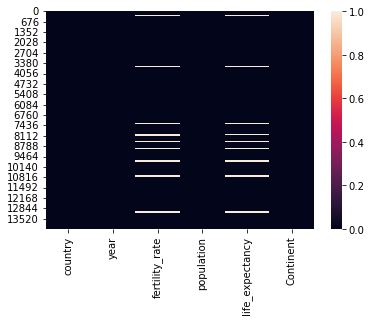

In [43]:
#Check the NaN values in the dataframe

sns.heatmap(merged_df.isna())

In [44]:
#Remove the rows with missing values 

merged_df_2 = merged_df.dropna()

In [45]:
merged_df_2.isnull().sum()

country            0
year               0
fertility_rate     0
population         0
life_expectancy    0
Continent          0
dtype: int64

## Plot the data

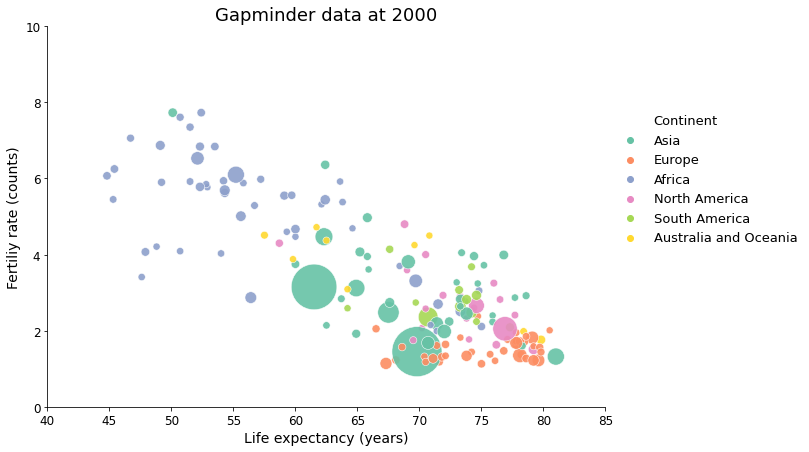

In [46]:
# Choose a year to depict

merge_df_subset = merged_df_2.loc[merged_df_2['year'] == 2000]

# By using the scatterplot function build the bubble map

plt.figure(figsize=(10, 7))

g = sns.scatterplot(data=merge_df_subset, x="life_expectancy", y="fertility_rate", size="population", hue="Continent", palette = 'Set2', sizes=(50, 2500), edgecolors="white", alpha=0.9)
h,l = g.get_legend_handles_labels()

plt.axis((40,85,0,10))
plt.xlabel('Life expectancy (years)', size = 14)
plt.ylabel('Fertiliy rate (counts)', size = 14)

plt.title('Gapminder data at 2000', size = 18)
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.0, 0.8), loc=2, frameon = False, fontsize = 13)
plt.gca().tick_params(axis='both', which='major', labelsize=12)

sns.despine()

# Display the graph
plt.show()

In [47]:
#Choose countries to indicate

country_list = ['Canada', 'China', 'Italy', 'Nigeria', 'Fiji', 'Brazil']

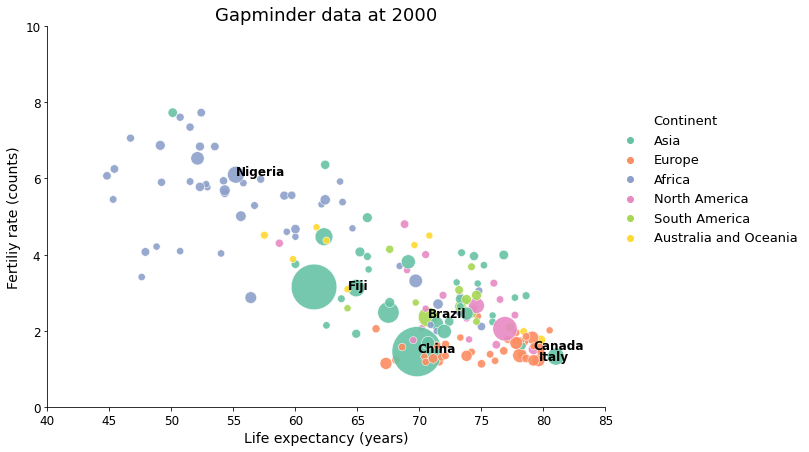

In [48]:
plt.figure(figsize=(10, 7))

g = sns.scatterplot(data=merge_df_subset, x="life_expectancy", y="fertility_rate", size="population", hue="Continent", palette = 'Set2', sizes=(50, 2500), edgecolors="white", alpha=0.9)
h,l = g.get_legend_handles_labels()
plt.axis((40,85,0,10))
plt.xlabel('Life expectancy (years)', size = 14)
plt.ylabel('Fertiliy rate (counts)', size = 14)
plt.title('Gapminder data at 2000', size = 18)
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.0, 0.8), loc=2, frameon = False, fontsize = 13)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
sns.despine()

for i in country_list:
    x_cor = float(merge_df_subset.loc[merge_df_subset['country']== i, ['life_expectancy']].values[0])
    y_cor = float(merge_df_subset.loc[merge_df_subset['country']== i, ['fertility_rate']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

## Create an animation to overlook multiple years

In [49]:
# Use Python module imageio

import imageio

In [50]:
#Loop through scatterplots by year

#Select countries to designate
country_list = ['Canada', 'China', 'Italy', 'Nigeria', 'Fiji', 'Brazil'] # 

#Select range of years to loop for and create scatterplots 
for year in merged_df_2['year'].unique():
    figure = plt.figure(figsize=(10, 7))
    merge_df_subset_step = merged_df_2.loc[merged_df_2['year'] == year]

    #Set the parameters for scatterplot
    g = sns.scatterplot(data=merge_df_subset_step, x="life_expectancy", y="fertility_rate", size="population", hue="Continent", palette = 'Set2', sizes=(50, 2500), edgecolors="white", alpha=0.9)
    h,l = g.get_legend_handles_labels()
    plt.axis((0,100,0,10))
    plt.xlabel('Life expectancy (years)', size = 14)
    plt.ylabel('Fertiliy rate (counts)', size = 14)
    plt.title(f'Life expectancy and fertility rate correlation at {year}', size = 18)
    plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.0, 0.8), loc=2, frameon = False, fontsize = 13)
    plt.gca().tick_params(axis='both', which='major', labelsize=12)
    sns.despine()

    # Indicate labeles for selected countries
    for i in country_list:
        x_cor = float(merge_df_subset_step.loc[merge_df_subset_step['country']== i, ['life_expectancy']].values[0])
        y_cor = float(merge_df_subset_step.loc[merge_df_subset_step['country']== i, ['fertility_rate']].values[0])
        plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

    #Save the figure
    plt.savefig(f'../data/yearly_step_images/life_expectancy_{year}.png', bbox_inches = 'tight', dpi = 200)
    plt.close(figure)


In [51]:
#Create an empty list
images = []

# Append all the rpeviously created images
for year in merged_df_2['year'].unique():
    filename = f'../data/yearly_step_images/life_expectancy_{year}.png'
    images.append(imageio.imread(filename))

#Create a gif 
imageio.mimsave('../data/animation_gapminder.gif', images, fps=10)

In [52]:
# To open a gif import the needed packages

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from pathlib import Path

<Figure size 720x504 with 0 Axes>

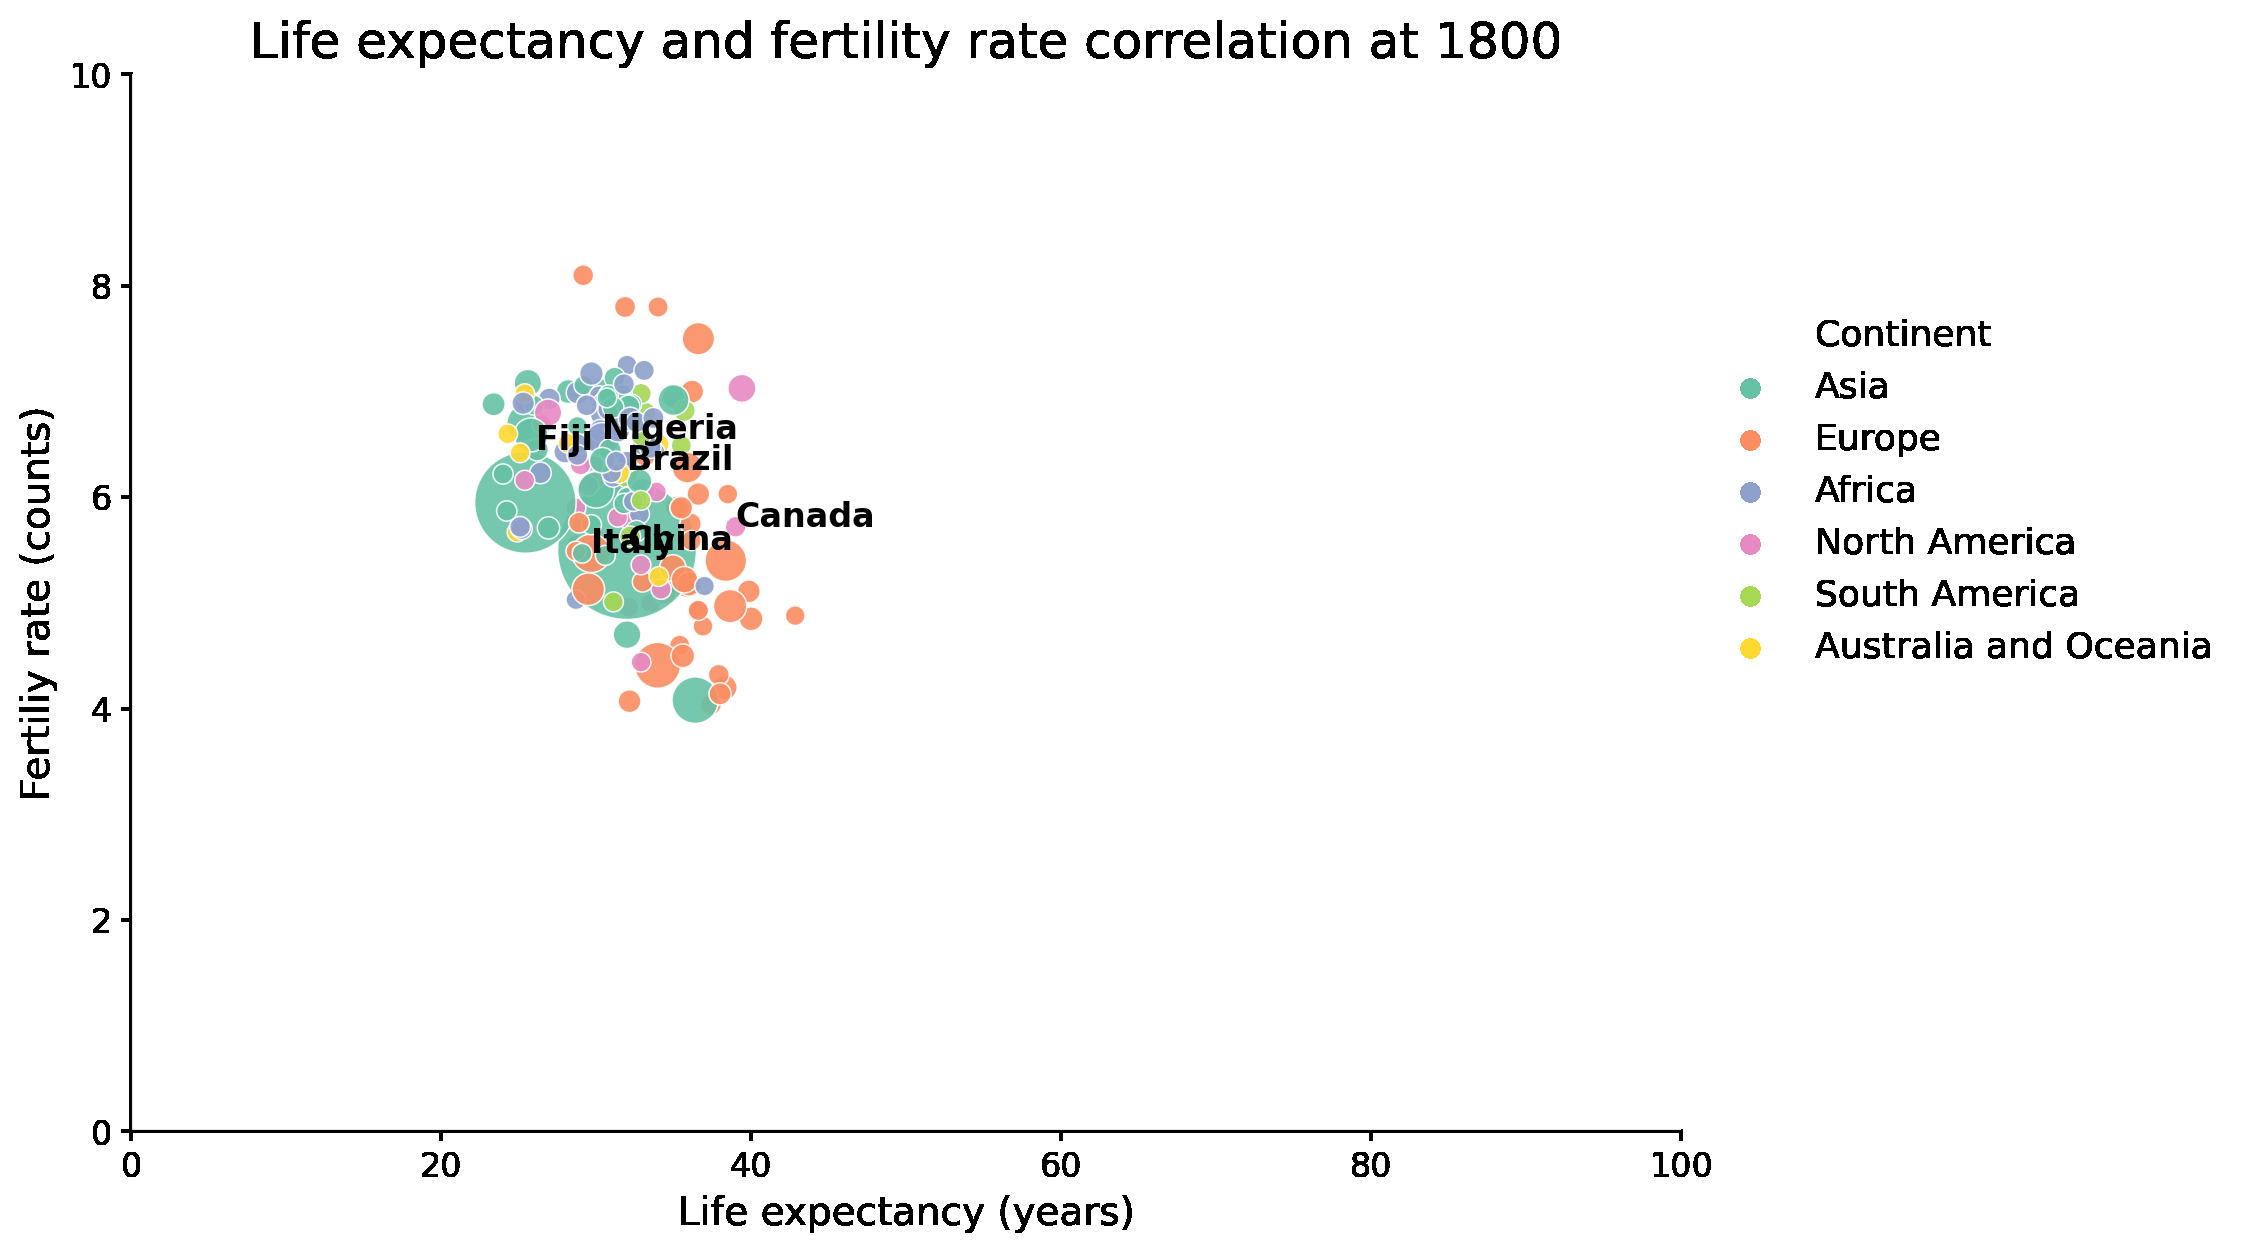

<Figure size 720x504 with 0 Axes>

In [53]:
#Display gif

plt.figure(figsize=(10, 7))

gif_path = Path("../data/animation_gapminder.gif")

with open(gif_path,'rb') as f:
    display.Image(data=f.read(), format='png', width = 800)

## Visualization with plotly 
### Using slider for year selection

In [54]:
#Import plotly

import plotly.express as px

In [55]:
fig = px.scatter(merged_df_2, x="life_expectancy", y="fertility_rate", 
    animation_frame="year", animation_group="country",size="population", size_max=60, color="Continent", hover_name="country",
    range_x=[0,100], range_y=[0,10], width=800, height=600, template="plotly_white", title=" Life expectancy and fertility rate correlation - Gapminder")
fig.show()